### 1. CLUSTER

#### 1.1. Elbow's method

In [2]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
import pandas as pd
import base64
import matplotlib.pyplot as plt
from io import BytesIO
df_cluster = pd.read_csv('active.csv')
PandasTools.AddMoleculeColumnToFrame(df_cluster, 'SMILES', 'Molecule')
import pandas as pd
import numpy as np
import seaborn as sn
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

def generate_fpts(data):
    Mfpts = []
    for mol in tqdm(data):
        mfpt = AllChem.GetMorganFingerprintAsBitVect(mol, 4, nBits=2048)
        Mfpts.append(mfpt)

    return np.array(Mfpts)
mfpts = generate_fpts(df_cluster.Molecule)

100%|██████████| 428/428 [00:00<00:00, 2656.66it/s]


In [3]:
morgan = pd.DataFrame(mfpts)
morgan

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans_kwargs = {
    "init": "random",
    "n_init": 20,
    "random_state": 78,
}

sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    distances = pairwise_distances(morgan.values, metric='jaccard')
    kmeans.fit(distances)
    sse.append(kmeans.inertia_)

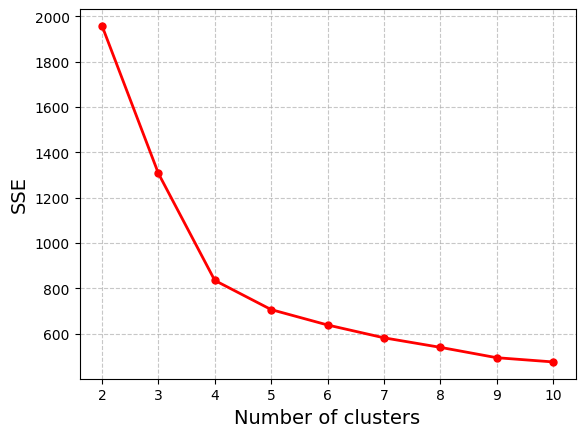

In [4]:
plt.plot(range(2, 11), sse, marker = '.', markersize = 10, linewidth = 2, color = 'red',)
plt.xticks(range(2, 11))
plt.xlabel("Number of clusters", fontsize = 14)
plt.ylabel("SSE", fontsize = 14)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

In [11]:
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

kmeans_kwargs = {
    "init": "random",
    "n_init": 20,
    "random_state": 78,
}

k = 4 

kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
distances = pairwise_distances(morgan.values, metric='jaccard')
kmeans.fit(distances)
labels = kmeans.labels_

#### 1.2. VISUALIZE

In [12]:
from sklearn.manifold import TSNE
X = morgan
tsne = TSNE(n_components=2, perplexity = 30.0, early_exaggeration=12.0, learning_rate=200, n_iter=1000,
            n_iter_without_progress=300,min_grad_norm=1e-07, metric='jaccard', random_state=42)
X_tsne = tsne.fit_transform(X)
tsne.kl_divergence_

0.31545284390449524

In [16]:
X_tsnefull = pd.DataFrame(X_tsne)
X_tsnefull['clusters'] = kmeans.labels_
Data_full = pd.concat([X_tsnefull, df_cluster], axis = 1)
# Data_full.to_csv('Data_full.csv')

In [29]:
X_tsnefull1 = pd.read_csv('Data_full.csv')
tsne0 = X_tsnefull1.loc[(X_tsnefull1['clusters'] == 0)].copy()
tsne1 = X_tsnefull1.loc[(X_tsnefull1['clusters'] == 1)].copy()
tsne2 = X_tsnefull1.loc[(X_tsnefull1['clusters'] == 2)].copy()
tsne3 = X_tsnefull1.loc[(X_tsnefull1['clusters'] == 3)].copy()

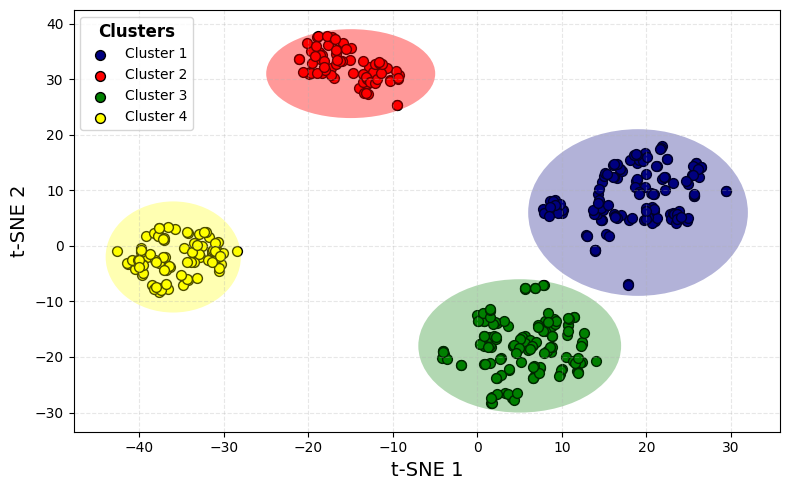

In [68]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

plt.figure(figsize=(8, 5))

data = [tsne0, tsne2, tsne1, tsne3]
colors = ['navy', 'red', 'green', 'yellow']
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

for i, d in enumerate(data):
    plt.scatter(d.iloc[:,1], d.iloc[:,2], color=colors[i], marker='o', s=50, label=labels[i], edgecolors='black')

plt.grid(axis='both', linestyle='--', alpha=0.3)

plt.xlabel("t-SNE 1", fontsize=14)
plt.ylabel("t-SNE 2", fontsize=14)


legend = plt.legend(title="Clusters", loc='upper left', fontsize=10)
plt.setp(legend.get_title(), fontsize=12, fontweight='bold')


u = -15   
v = 31    
a = 10    
b = 8  
angle = 0  
ellipse = patches.Ellipse((u, v), 2 * a, 2 * b, angle=angle, linewidth=2, fill=True, facecolor='red', alpha=0.4)
plt.gca().add_patch(ellipse)


u2 = -36 
v2 = -2  
a2 = 8 
b2 = 10    
angle2 = 0 
ellipse2 = patches.Ellipse((u2, v2), 2 * a2, 2 * b2, angle=angle2, linewidth=2, fill=True, facecolor='yellow', alpha=0.3)
plt.gca().add_patch(ellipse2)

u3 = 19  
v3 = 6 
a3 = 13   
b3 = 15     
angle3 = 0 
ellipse3 = patches.Ellipse((u3, v3), 2 * a3, 2 * b3, angle=angle3, linewidth=2, fill=True, facecolor='navy', alpha=0.3)
plt.gca().add_patch(ellipse3)

u4 = 5   
v4 = -18   
a4 = 12  
b4 = 12    
angle4 = 0 
ellipse4 = patches.Ellipse((u4, v4), 2 * a4, 2 * b4, angle=angle4, linewidth=2, fill=True, facecolor='green', alpha=0.3)
plt.gca().add_patch(ellipse4)

plt.tight_layout()
plt.show()

In [240]:
for index, row in X_tsnefull1.iterrows():
    smiles = row['SMILES']
    mol = Chem.MolFromSmiles(smiles)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 4, nBits=2048)
    X_tsnefull1.at[index, 'fp'] = fp

In [241]:
def calc_tanimoto(fp1, fp2):
    tc = DataStructs.TanimotoSimilarity(fp1, fp2)
    return round(tc,2)

In [242]:
import numpy as np
y = X_tsnefull1['fp']
Y = pd.DataFrame(y)
x = X_tsnefull1['fp']
X = pd.DataFrame(x)

matrix = np.zeros((len(X), len(Y)))

for i, row_x in X.iterrows():
    smiles_x = row_x['fp']
    for j, row_y in Y.iterrows():
        smiles_y = row_y['fp']
        coefficient = calc_tanimoto(smiles_x, smiles_y)
        matrix[i, j] = coefficient

matrixx = pd.DataFrame(matrix)

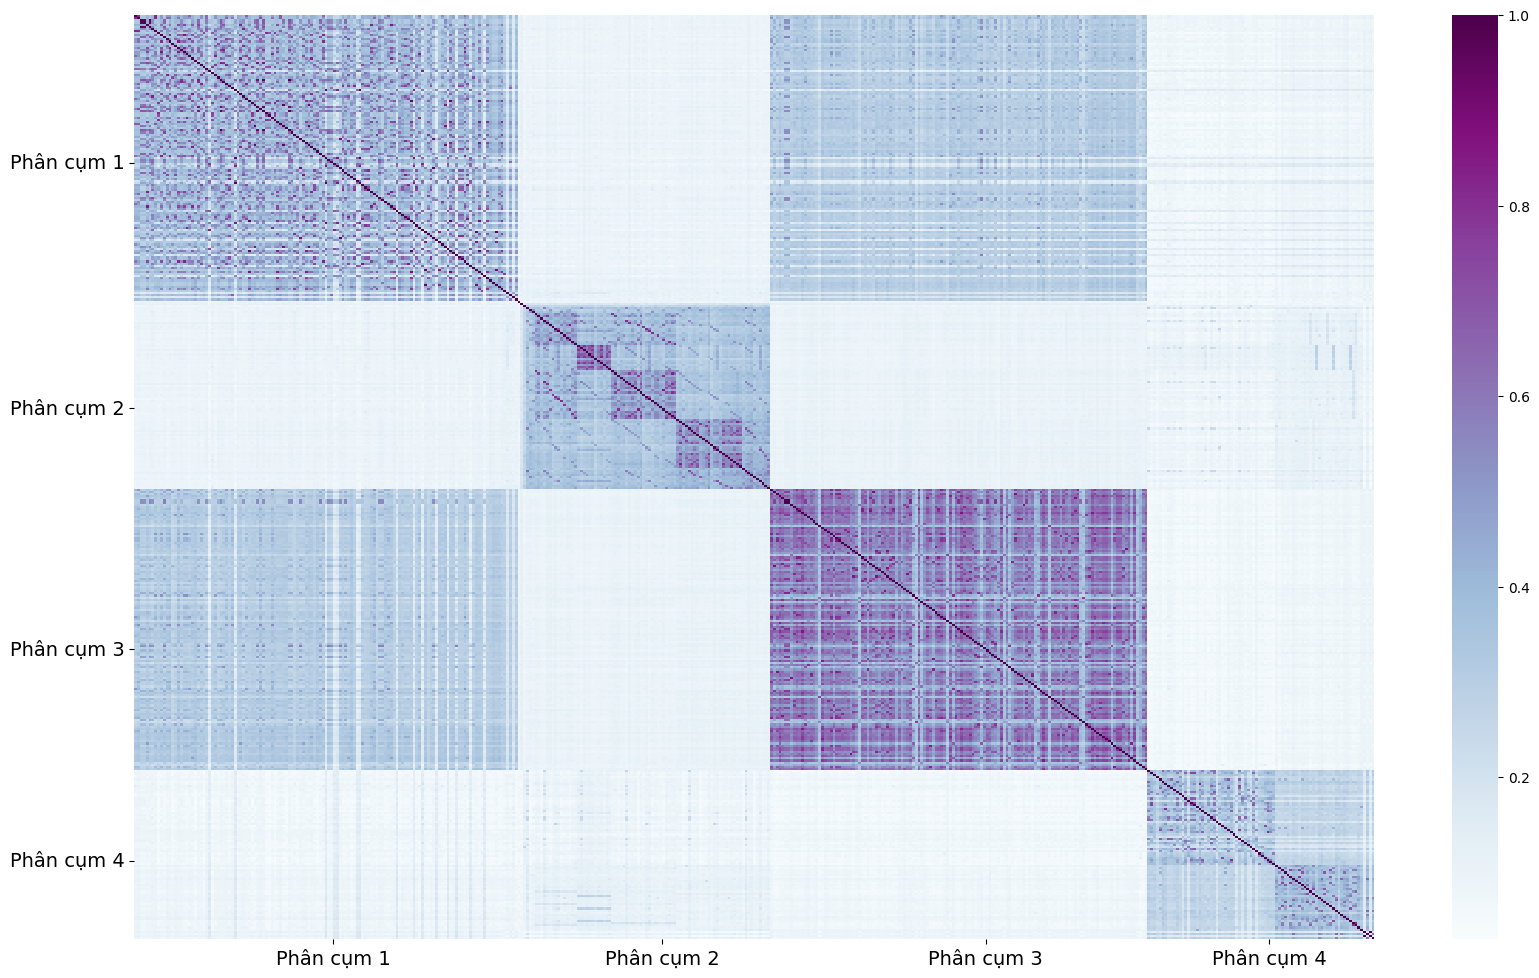

In [282]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))
sns.heatmap(matrixx, cmap='BuPu')
plt.xticks(ticks=[70, 186, 300, 400], labels=['Phân cụm 1', 'Phân cụm 2','Phân cụm 3', 'Phân cụm 4'], rotation = 0, fontsize = 14,)
plt.yticks(ticks=[70, 186, 300, 400], labels=['Phân cụm 1', 'Phân cụm 2','Phân cụm 3', 'Phân cụm 4'], fontsize = 14)
plt.show()

### 2. SCAFFOLDGRAPH

In [303]:
pip install scaffoldgraph

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
import scaffoldgraph as sg
import networkx as nx
import matplotlib.pyplot as plt
from rdkit.Chem import Draw
from rdkit import Chem
import random
import os

In [65]:
pd.set_option('max_colwidth', 8000)
sdf_file = os.path.dirname(sg.__file__).replace('scaffoldgraph', 'examples/Cluster1.sdf')   #Replace Cluster 1 with 2,3,4
supplier = Chem.SDMolSupplier(sdf_file)
network = sg.HierS.from_sdf(sdf_file, progress=True)
n_scaffolds = network.num_scaffold_nodes
n_molecules = network.num_molecule_nodes
print('\nGenerated scaffold network from {} molecules with {} scaffolds\n'.format(n_molecules, n_scaffolds))
import pandas as pd
scaffolds = list(network.get_scaffold_nodes())
scaffoldd = pd.DataFrame(scaffolds)
scaffoldd

HierS: 100%|██████████| 137/137 [00:02<00:00, 63.24it/s]


Generated scaffold network from 137 molecules with 207 scaffolds



,0
0,O=C(NCCCn1ccnc1)N(CC1CCCC1)c1ccc(OCCN2CCOCC2)cc1
1,c1cc(OCCN2CCOCC2)ccc1NCC1CCCC1
2,c1ccc(OCCN2CCOCC2)cc1
3,C1COCCN1
4,c1ccccc1
...,...
202,O=c1c2ccsc2[nH]c(=S)n1CCCn1ccnc1
203,O=C(NCCCn1ccnc1)N(c1ccccc1)c1nccs1
204,O=C(NCCCn1ccnc1)Nc1nccs1
205,c1cscn1
